In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataframe = pd.read_csv('dataset/Dataset40A.csv')
dataframe.head()

,Customer ID,InvoiceDate,Description,StockCode,Price,Quantity
0,-1.554577,-0.643216,-1.770576,1.899246,0.882579,-0.000477
1,-1.554577,-0.643216,0.624298,-0.201893,-0.198194,0.516378
2,-1.554577,-0.643216,1.302979,-1.148082,-0.387608,0.171808
3,-1.554577,-0.643216,0.455774,-0.167350,-0.298472,0.171808
4,-1.554577,-0.643216,0.902878,-0.367101,-0.387608,0.171808


In [4]:
dataframe.describe()

,Customer ID,InvoiceDate,Description,StockCode,Price,Quantity
count,3.189050e+05,3.189050e+05,3.189050e+05,3.189050e+05,3.189050e+05,3.189050e+05
mean,-1.052192e-16,1.490254e-14,1.841573e-15,7.247205e-15,9.749863e-13,4.233874e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.018983e+00,-1.669865e+00,-1.823311e+00,-1.894519e+00,-6.661581e-01,-1.584053e-01
25%,-8.475984e-01,-8.978100e-01,-8.339500e-01,-7.771159e-01,-3.876082e-01,-1.440482e-01
50%,1.585757e-02,-2.179576e-02,-5.209082e-02,-1.716132e-02,-2.316203e-01,-1.153340e-01
75%,8.654882e-01,8.737373e-01,7.985536e-01,6.316536e-01,1.694915e-01,-4.772568e-04
max,1.714490e+00,1.764603e+00,1.701933e+00,2.178597e+00,6.507161e+01,1.433982e+02


In [5]:
print(dataframe.groupby('StockCode').size())

StockCode
-1.894519    217
-1.893018      6
-1.891516      1
-1.890014     34
-1.888512     65
            ... 
 2.172589     10
 2.174091      7
 2.175593     25
 2.177095      2
 2.178597      7
Length: 2713, dtype: int64


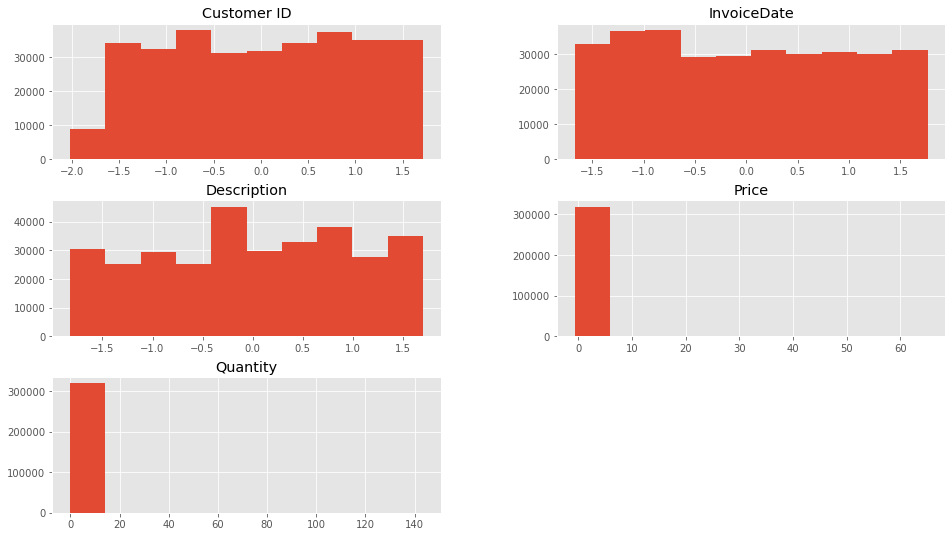

In [6]:
dataframe.drop(['StockCode'],1).hist()
plt.show()

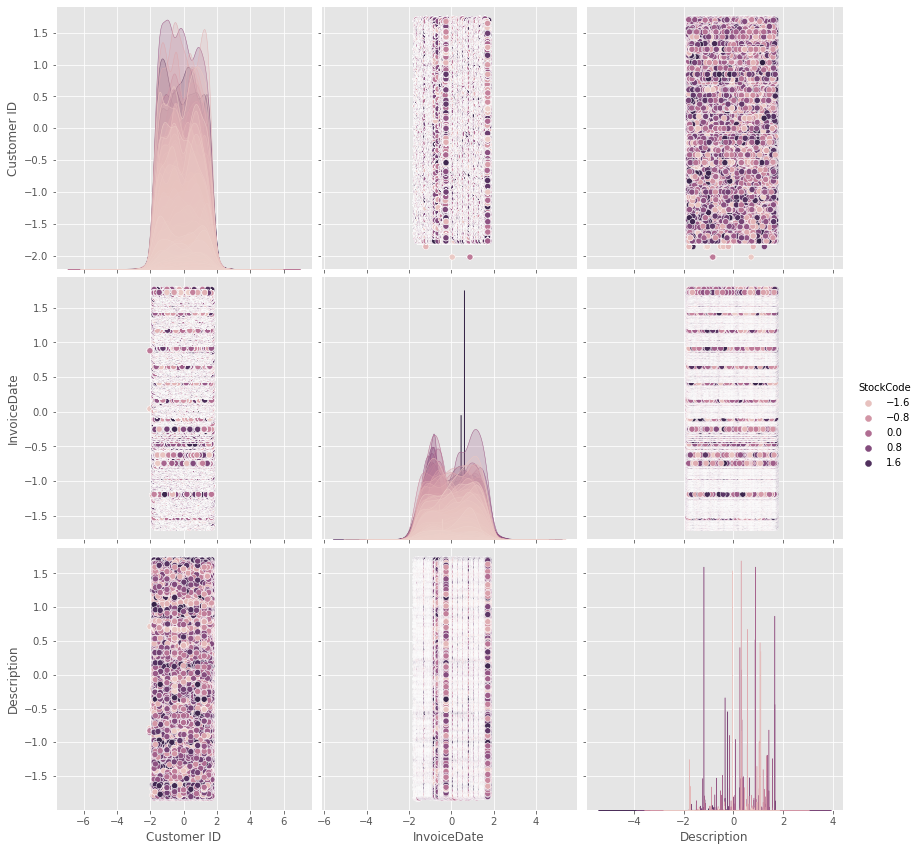

In [7]:
sb.pairplot(dataframe.dropna(), hue='StockCode',size=4,vars=["Customer ID","InvoiceDate","Description"],kind='scatter')

In [8]:
X = np.array(dataframe[["Customer ID","InvoiceDate","Description"]])
y = np.array(dataframe['StockCode'])
X.shape

(318905, 3)

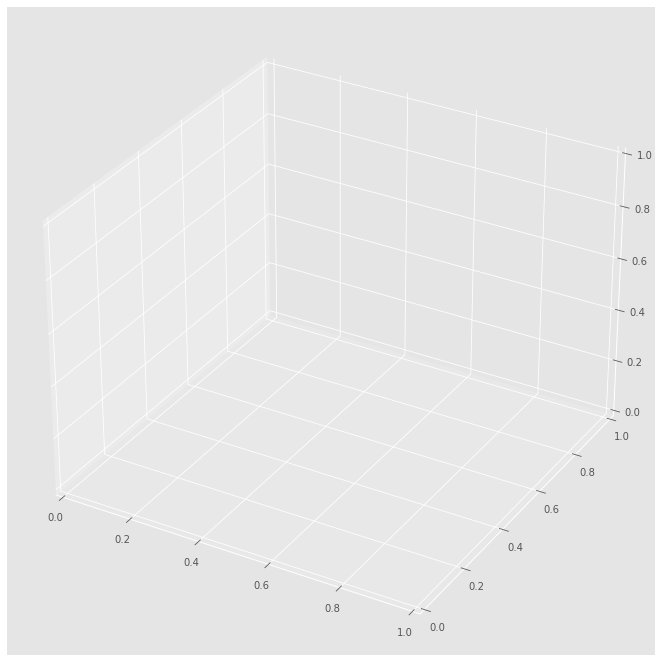

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]

In [20]:
colores[1]

'red'

In [22]:
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

TypeError: list indices must be integers or slices, not numpy.float64

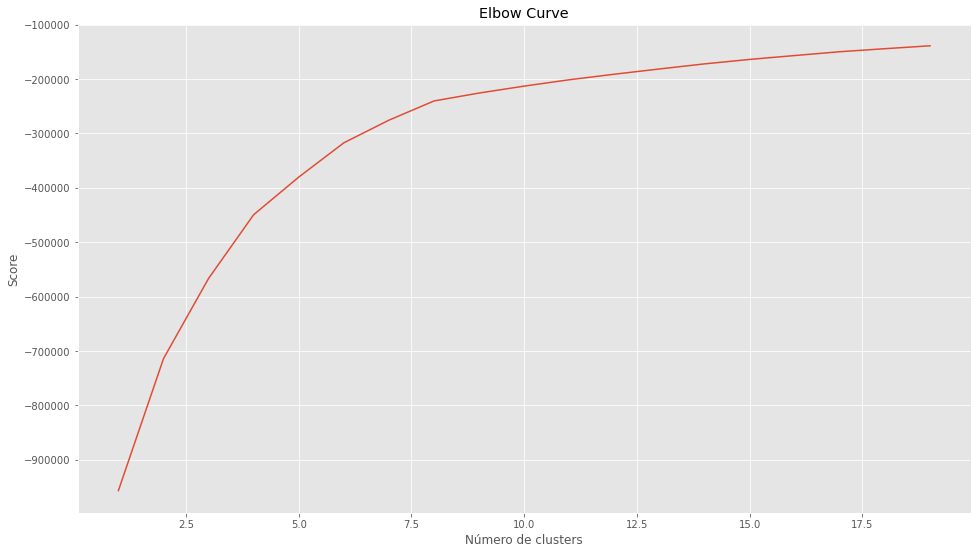

In [23]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.91911754  0.83630515  0.67502686]
 [ 0.82891039 -0.74527186 -0.85250838]
 [-0.94405356 -0.16246834 -0.92555112]
 [ 0.87538021  0.97663555  0.06410019]
 [ 0.08169045 -0.89335051  0.92440538]]


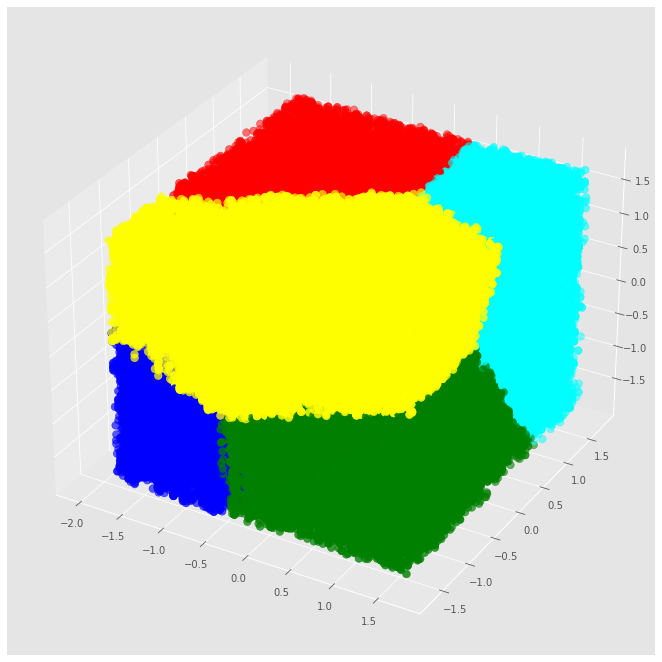

In [25]:
# predecir con kmeans
labels = kmeans.predict(X)
# Obtener los clústeres
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

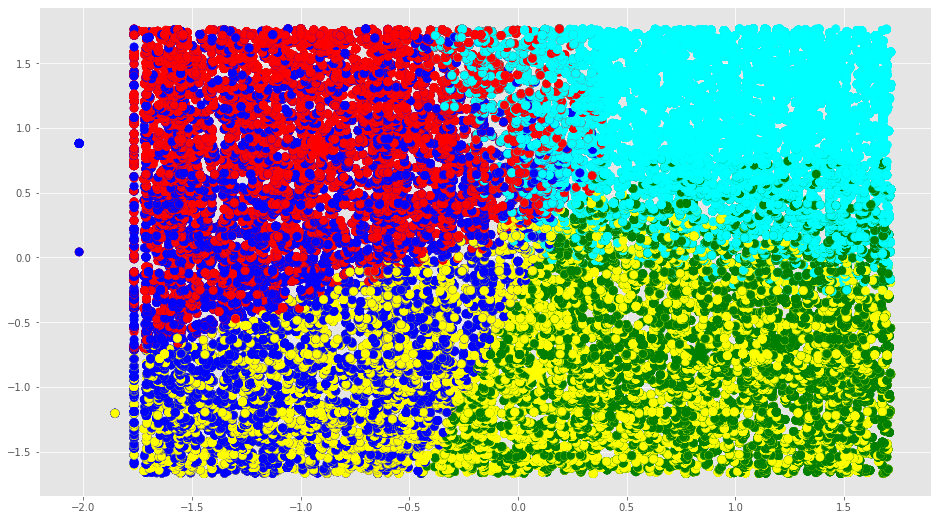

In [26]:
# Valores para la gráfica
f1 = dataframe['Customer ID'].values
f2 = dataframe['InvoiceDate'].values
# Gráfica
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

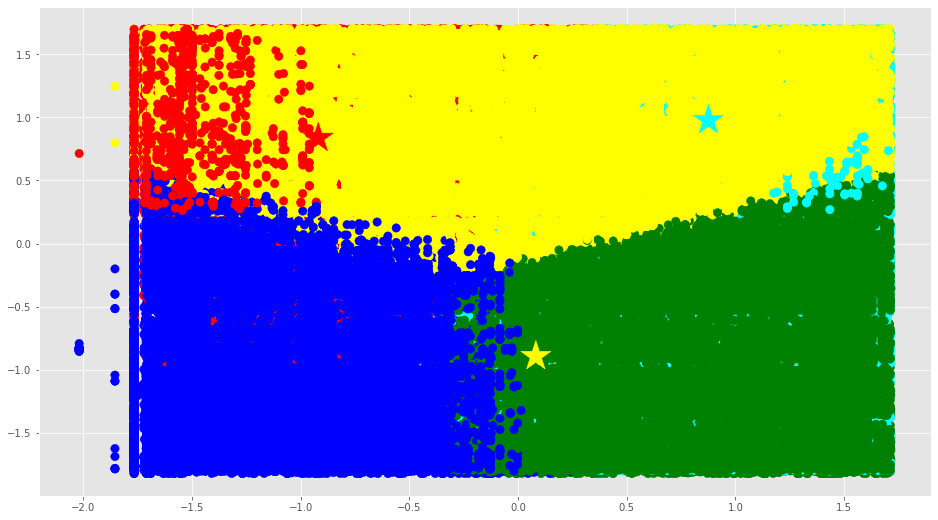

In [27]:
# Valores para la gráfica
f1 = dataframe['Customer ID'].values
f2 = dataframe['Description'].values
# Gráfica
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

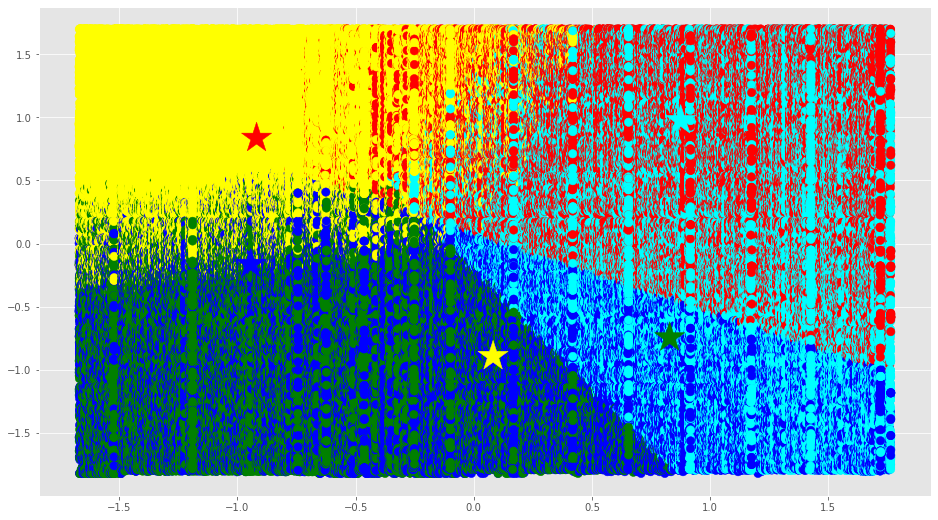

In [28]:
# Valores para la gráfica
f1 = dataframe['InvoiceDate'].values
f2 = dataframe['Description'].values
# Gráfica
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [46]:
copy =  pd.DataFrame()
copy['Customer ID']=dataframe['Customer ID'].values
copy['StockCode']=dataframe['StockCode'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,56622
1,green,56095
2,blue,65293
3,cyan,69988
4,yellow,70907
